In [44]:
#IMPORT LIBRARIES

!pip install pandas numpy scikit-learn nltk matplotlib shap


INFO: pip is looking at multiple versions of shap to determine which version is compatible with other requirements. This could take a while.
   ---------------------------------------- 0.0/548.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/548.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/548.0 kB ? eta -:--:--
   ------------------- -------------------- 262.1/548.0 kB ? eta -:--:--
   ------------------- -------------------- 262.1/548.0 kB ? eta -:--:--
   ---------------------------------------- 548.0/548.0 kB 731.2 kB/s  0:00:00

   -------------------- ------------------- 1/2 [shap]
   -------------------- ------------------- 1/2 [shap]
   -------------------- ------------------- 1/2 [shap]
   -------------------- ------------------- 1/2 [shap]
   -------------------- ------------------- 1/2 [shap]
   -------------------- ------------------- 1/2 [shap]
   ---------------------------------------- 2/2 [shap]



In [46]:
#IMPORTING

import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE


In [48]:
#LOAD DATASET


df = pd.read_csv(
    "dataset/fake_job_postings.csv",
    engine="python",
    on_bad_lines="skip"
)

print("Dataset loaded:", df.shape)


Dataset loaded: (17880, 18)


In [50]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [52]:
#CLEAN TARGET COLUMN

# Remove rows with missing labels
df = df.dropna(subset=['fraudulent'])

# Convert target to integer
df['fraudulent'] = df['fraudulent'].astype(int)

# Reset index
df = df.reset_index(drop=True)

print("After cleaning:", df.shape)


After cleaning: (17880, 18)


In [54]:
#COMBINE TEXT FEATURES

df['text'] = (
    df['title'].fillna('') + ' ' +
    df['company_profile'].fillna('') + ' ' +
    df['description'].fillna('') + ' ' +
    df['requirements'].fillna('')
)


In [56]:
#FEATURES & LABEL

X_text = df['text']
y = df['fraudulent']

print("Samples:", X_text.shape[0], y.shape[0])


Samples: 17880 17880


In [58]:
#TF-IDF VECTORIZATION
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X_tfidf = tfidf.fit_transform(X_text)

In [59]:
# Handle imbalance
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_tfidf, y)

In [60]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.2, random_state=42
)

🔹 MODEL 1: LOGISTIC REGRESSION

In [61]:
#TRAIN LOGISTIC REGRESSION

log_model = LogisticRegression(
    max_iter=1000,
    class_weight='balanced'
)

log_model.fit(X_train, y_train)



LogisticRegression(class_weight='balanced', max_iter=1000)

In [66]:
#EVALUATE LOGISTIC REGRESSION

log_pred = log_model.predict(X_test)

print("===== LOGISTIC REGRESSION RESULTS =====")
print("Accuracy:", accuracy_score(y_test, log_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, log_pred))
print("\nClassification Report:")
print(classification_report(y_test, log_pred))


===== LOGISTIC REGRESSION RESULTS =====
Accuracy: 0.9847193652659418

Confusion Matrix:
[[3330   66]
 [  38 3372]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      3396
           1       0.98      0.99      0.98      3410

    accuracy                           0.98      6806
   macro avg       0.98      0.98      0.98      6806
weighted avg       0.98      0.98      0.98      6806



🔹 MODEL 2: SUPPORT VECTOR MACHINE

In [68]:
#TRAIN SVM (LINEAR SVC)

svm_model = LinearSVC(class_weight='balanced')

svm_model.fit(X_train, y_train)


C:\Users\rathi\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC(class_weight='balanced')

In [70]:
#EVALUATE SVM

svm_pred = svm_model.predict(X_test)

print("===== SVM RESULTS =====")
print("Accuracy:", accuracy_score(y_test, svm_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, svm_pred))
print("\nClassification Report:")
print(classification_report(y_test, svm_pred))


===== SVM RESULTS =====
Accuracy: 0.9951513370555393

Confusion Matrix:
[[3365   31]
 [   2 3408]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      3396
           1       0.99      1.00      1.00      3410

    accuracy                           1.00      6806
   macro avg       1.00      1.00      1.00      6806
weighted avg       1.00      1.00      1.00      6806



🔹 COMPARISON SUMMARY

In [72]:
print("===== MODEL COMPARISON =====")
print("Logistic Regression Accuracy:", accuracy_score(y_test, log_pred))
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))


===== MODEL COMPARISON =====
Logistic Regression Accuracy: 0.9847193652659418
SVM Accuracy: 0.9951513370555393


🔹 PREDICTION FUNCTION

In [74]:
# Prediction function
def predict_job(text):
    text_vec = tfidf.transform([text])
    return "Fraudulent" if svm_model.predict(text_vec)[0] == 1 else "Real"


In [76]:
print(predict_job("Software Engineer job at IT company. Salary as per experience. No fees."))
print(predict_job("Work from home job. Earn 60000 weekly. Registration fee required."))
print(predict_job("Accountant required for private firm. Interview at office location."))
print(predict_job("Online job. High income guaranteed. Pay money to start work."))
print(predict_job("Data analyst role with Python skills. Full-time company position."))


Real
Real
Fraudulent
Fraudulent
Real


🔹 SHAP works best and fastest
with linear models.

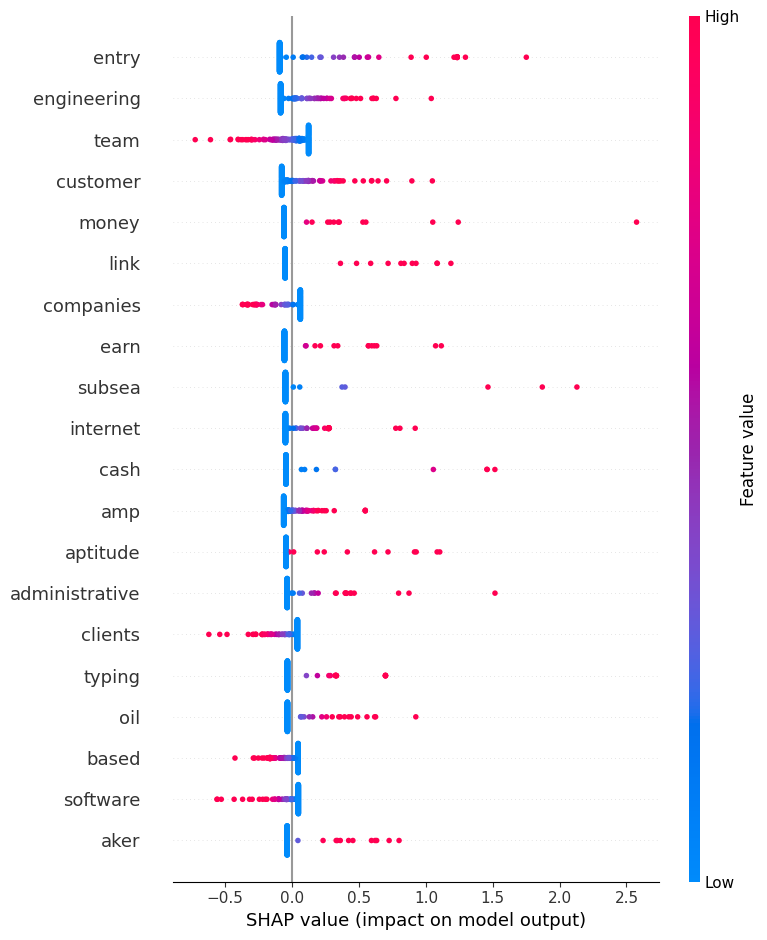

In [78]:
import shap

# Convert sparse matrix to dense for SHAP (sample only for speed)
X_test_dense = X_test[:200].toarray()

explainer = shap.Explainer(log_model, X_test_dense)
shap_values = explainer(X_test_dense)

# SHAP summary plot
shap.summary_plot(shap_values, X_test_dense, feature_names=tfidf.get_feature_names_out())


🔹 HEATMAP CONFUSION MATRIX

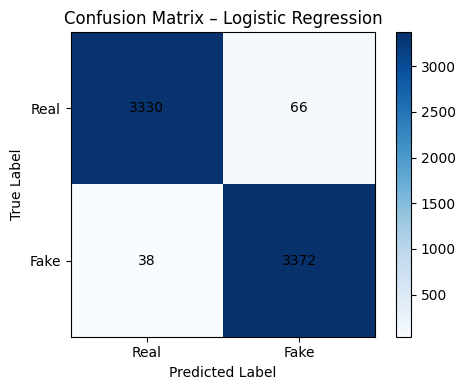

In [80]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Generate confusion matrix (Logistic Regression example)
cm = confusion_matrix(y_test, log_pred)

plt.figure(figsize=(5, 4))
plt.imshow(cm, cmap="Blues")
plt.title("Confusion Matrix – Logistic Regression")
plt.colorbar()

plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.xticks([0, 1], ["Real", "Fake"])
plt.yticks([0, 1], ["Real", "Fake"])

# Add values inside the cells
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j],
                 ha="center", va="center",
                 color="black")

plt.tight_layout()
plt.show()


🔹 ROC CURVE

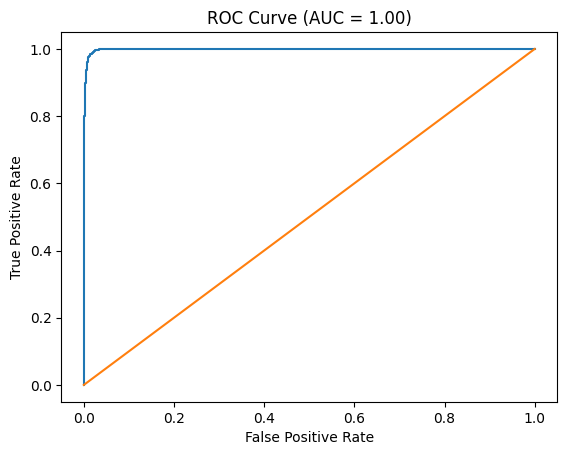

In [82]:
from sklearn.metrics import roc_curve, auc

y_prob = log_model.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC Curve (AUC = {roc_auc:.2f})")
plt.show()


🔹 MODEL COMPARISON BAR CHART

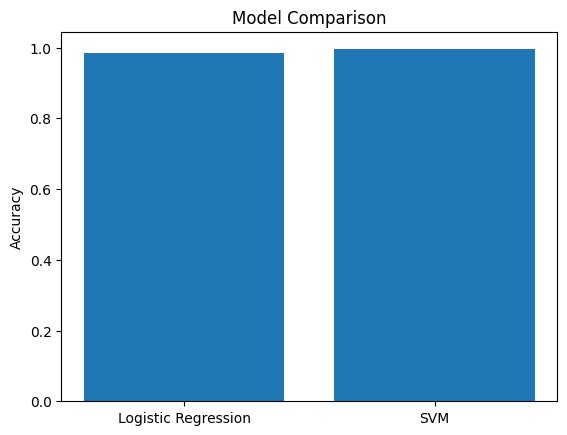

In [84]:
from sklearn.metrics import accuracy_score

lr_acc = accuracy_score(y_test, log_pred)
svm_acc = accuracy_score(y_test, svm_pred)

models = ["Logistic Regression", "SVM"]
accuracies = [lr_acc, svm_acc]

plt.figure()
plt.bar(models, accuracies)
plt.ylabel("Accuracy")
plt.title("Model Comparison")
plt.show()


🔹 FEATURE IMPORTANCE (TOP KEYWORDS)

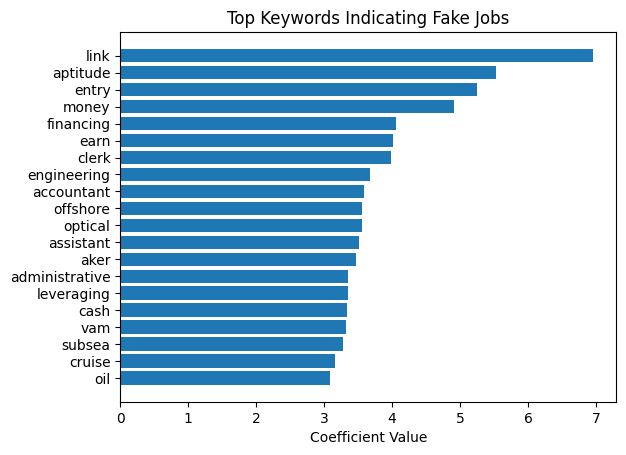

In [86]:
feature_names = tfidf.get_feature_names_out()
coefficients = log_model.coef_[0]

# Top positive (Fake indicators)
top_fake = np.argsort(coefficients)[-20:]

plt.figure()
plt.barh(feature_names[top_fake], coefficients[top_fake])
plt.title("Top Keywords Indicating Fake Jobs")
plt.xlabel("Coefficient Value")
plt.show()


Save the model

In [88]:
import pickle
# Save the model
with open("model.pkl", "wb") as f:
    pickle.dump(svm_model, f)
    print("svm-reg model saved")

# Save the model
with open("model.pkl", "wb") as f:
    pickle.dump(log_model, f)
    print("log-reg model saved")

# Save the vectorizer
with open("vectorizer.pkl", "wb") as f:
    pickle.dump(tfidf, f)

print("Model and vectorizer saved successfully")


svm-reg model saved
log-reg model saved
Model and vectorizer saved successfully
